In [1]:
import pandas as pd
import numpy as np

In [76]:
df = pd.read_csv('BritishAirwaysR.csv')
df.head(10)

,Unnamed: 0,reviews,stars,date,country,seat_type
0,0,Not Verified | The staff are very rude and not...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,11th August 2023,United Kingdom,Economy Class
1,1,✅ Trip Verified | Good domestic flight operat...,2,8th August 2023,United Kingdom,Economy Class
2,2,Not Verified | Failed at all basic travel fund...,10,8th August 2023,Canada,Economy Class
3,3,✅ Trip Verified | They lost my baggage in a v...,1,8th August 2023,Poland,Economy Class
4,4,✅ Trip Verified | Late boarding led to a one ...,1,5th August 2023,United Kingdom,Economy Class
5,5,✅ Trip Verified | As usual the flight is delay...,1,4th August 2023,United Kingdom,Economy Class
6,6,✅ Trip Verified | I had the most fantastic BA...,1,1st August 2023,Hong Kong,Business Class
7,7,✅ Trip Verified | Couldn’t book in online. Ar...,10,31st July 2023,United Kingdom,Economy Class
8,8,✅ Trip Verified | London Heathrow to Mumbai in...,1,31st July 2023,Iceland,Business Class
9,9,"✅ Trip Verified | Keflavík, Iceland to London ...",9,31st July 2023,Iceland,Business Class


In [3]:
df = df.rename(columns={'Unnamed: 0': 'No'})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   No         3500 non-null   int64 
 1   reviews    3500 non-null   object
 2   stars      3500 non-null   object
 3   date       3500 non-null   object
 4   country    3498 non-null   object
 5   seat_type  3500 non-null   object
dtypes: int64(1), object(5)
memory usage: 164.2+ KB


In [5]:
#df = df.drop('Unnamed: 0', axis = 1)

In [6]:
df.columns

Index(['No', 'reviews', 'stars', 'date', 'country', 'seat_type'], dtype='object')

In [7]:
df['verified'] = df.reviews.str.contains("Trip Verified")

# Cleaning Data

## Cleaning Review

In [8]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [9]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [10]:
# fungsi untuk membersihkan kolom
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# aplikasi
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,No,reviews,stars,date,country,seat_type,verified,Cleaned Reviews
0,0,The staff are very rude and not trained prope...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,11th August 2023,United Kingdom,Economy Class,False,The staff are very rude and not trained prope...
1,1,Good domestic flight operated by BA Cityflye...,2,8th August 2023,United Kingdom,Economy Class,True,Good domestic flight operated by BA Cityflyer...
2,2,Failed at all basic travel fundamentals: 1) O...,10,8th August 2023,Canada,Economy Class,False,Failed at all basic travel fundamentals Our f...
3,3,They lost my baggage in a very simple situat...,1,8th August 2023,Poland,Economy Class,True,They lost my baggage in a very simple situati...
4,4,Late boarding led to a one hour flight leavi...,1,5th August 2023,United Kingdom,Economy Class,True,Late boarding led to a one hour flight leavin...


In [11]:
"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist 

df['POS tag'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,No,reviews,stars,date,country,seat_type,verified,Cleaned Reviews,POS tag
0,0,The staff are very rude and not trained prope...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,11th August 2023,United Kingdom,Economy Class,False,The staff are very rude and not trained prope...,"[(staff, n), (rude, a), (trained, v), (properl..."
1,1,Good domestic flight operated by BA Cityflye...,2,8th August 2023,United Kingdom,Economy Class,True,Good domestic flight operated by BA Cityflyer...,"[(Good, a), (domestic, a), (flight, n), (opera..."
2,2,Failed at all basic travel fundamentals: 1) O...,10,8th August 2023,Canada,Economy Class,False,Failed at all basic travel fundamentals Our f...,"[(Failed, v), (basic, a), (travel, n), (fundam..."
3,3,They lost my baggage in a very simple situat...,1,8th August 2023,Poland,Economy Class,True,They lost my baggage in a very simple situati...,"[(lost, v), (baggage, n), (simple, a), (situat..."
4,4,Late boarding led to a one hour flight leavi...,1,5th August 2023,United Kingdom,Economy Class,True,Late boarding led to a one hour flight leavin...,"[(Late, r), (boarding, n), (led, v), (one, Non..."


In [13]:
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tag'].apply(lemmatize)
df.head()

,No,reviews,stars,date,country,seat_type,verified,Cleaned Reviews,POS tag,Lemma
0,0,The staff are very rude and not trained prope...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,11th August 2023,United Kingdom,Economy Class,False,The staff are very rude and not trained prope...,"[(staff, n), (rude, a), (trained, v), (properl...",staff rude train properly exception make chi...
1,1,Good domestic flight operated by BA Cityflye...,2,8th August 2023,United Kingdom,Economy Class,True,Good domestic flight operated by BA Cityflyer...,"[(Good, a), (domestic, a), (flight, n), (opera...",Good domestic flight operate BA Cityflyer Gr...
2,2,Failed at all basic travel fundamentals: 1) O...,10,8th August 2023,Canada,Economy Class,False,Failed at all basic travel fundamentals Our f...,"[(Failed, v), (basic, a), (travel, n), (fundam...",Failed basic travel fundamental flight delay...
3,3,They lost my baggage in a very simple situat...,1,8th August 2023,Poland,Economy Class,True,They lost my baggage in a very simple situati...,"[(lost, v), (baggage, n), (simple, a), (situat...",lose baggage simple situation three week car...
4,4,Late boarding led to a one hour flight leavi...,1,5th August 2023,United Kingdom,Economy Class,True,Late boarding led to a one hour flight leavin...,"[(Late, r), (boarding, n), (led, v), (one, Non...",Late boarding lead one hour flight leave two...


### Sentiment Analysis using Vader

metode analisis yang menghasilkan class sentimen berdasarkan lexicon dengan source bahasa en (english)

In [14]:
!pip install vaderSentiment

In [15]:
analyzer = SentimentIntensityAnalyzer()

# fungsi untuk kalkulasi kadar sentimen
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# fungsi analisis
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,No,reviews,stars,date,country,seat_type,verified,Cleaned Reviews,POS tag,Lemma,Sentiment,Analysis
0,0,The staff are very rude and not trained prope...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,11th August 2023,United Kingdom,Economy Class,False,The staff are very rude and not trained prope...,"[(staff, n), (rude, a), (trained, v), (properl...",staff rude train properly exception make chi...,-0.7698,Negative
1,1,Good domestic flight operated by BA Cityflye...,2,8th August 2023,United Kingdom,Economy Class,True,Good domestic flight operated by BA Cityflyer...,"[(Good, a), (domestic, a), (flight, n), (opera...",Good domestic flight operate BA Cityflyer Gr...,0.9420,Positive
2,2,Failed at all basic travel fundamentals: 1) O...,10,8th August 2023,Canada,Economy Class,False,Failed at all basic travel fundamentals Our f...,"[(Failed, v), (basic, a), (travel, n), (fundam...",Failed basic travel fundamental flight delay...,-0.9019,Negative
3,3,They lost my baggage in a very simple situat...,1,8th August 2023,Poland,Economy Class,True,They lost my baggage in a very simple situati...,"[(lost, v), (baggage, n), (simple, a), (situat...",lose baggage simple situation three week car...,0.5574,Positive
4,4,Late boarding led to a one hour flight leavi...,1,5th August 2023,United Kingdom,Economy Class,True,Late boarding led to a one hour flight leavin...,"[(Late, r), (boarding, n), (led, v), (one, Non...",Late boarding lead one hour flight leave two...,-0.6908,Negative


In [16]:
df = df.drop('reviews', axis = 1)
df = df.drop('Cleaned Reviews', axis = 1)
df = df.drop('POS tag', axis = 1)
df = df.drop('Lemma', axis = 1)
df.columns

Index(['No', 'stars', 'date', 'country', 'seat_type', 'verified', 'Sentiment',
       'Analysis'],
      dtype='object')

## Handle False Data Type

In [17]:
from datetime import datetime

month_to_number = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Konversi tanggal
def convert_date(date_str):
    day, month_name, year = date_str.split()
    month = month_to_number.get(month_name, -1)
    if month == -1:
        return "Invalid month name"
    date_obj = datetime(year=int(year), month=month, day=int(day[:-2]))
    formatted_date = date_obj.strftime('%d %B %Y')
    return formatted_date

# Aplikasikan
df["date"] = df["date"].apply(convert_date)

# Cetak DataFrame hasil
df

,No,stars,date,country,seat_type,verified,Sentiment,Analysis
0,0,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,11 August 2023,United Kingdom,Economy Class,False,-0.7698,Negative
1,1,2,08 August 2023,United Kingdom,Economy Class,True,0.9420,Positive
2,2,10,08 August 2023,Canada,Economy Class,False,-0.9019,Negative
3,3,1,08 August 2023,Poland,Economy Class,True,0.5574,Positive
4,4,1,05 August 2023,United Kingdom,Economy Class,True,-0.6908,Negative
...,...,...,...,...,...,...,...,...
3495,3495,3,25 June 2014,United Kingdom,First Class,False,0.0000,Neutral
3496,3496,6,23 June 2014,United Kingdom,Economy Class,False,0.0000,Neutral
3497,3497,8,23 June 2014,United Kingdom,Premium Economy,False,0.0000,Neutral
3498,3498,9,20 June 2014,United Kingdom,Business Class,False,0.0000,Neutral


In [18]:
df['stars'].unique()

array(['\n\t\t\t\t\t\t\t\t\t\t\t\t\t5', '2', '10', '1', '9', '6', '4',
       '8', '3', '7', '5', 'None'], dtype=object)

In [19]:
df["stars"] = df["stars"].str.replace('\n\t\t\t\t\t\t\t\t\t\t\t\t\t5', '5')
df["stars"] = df["stars"].str.replace('None', '0')
df.head()

,No,stars,date,country,seat_type,verified,Sentiment,Analysis
0,0,5,11 August 2023,United Kingdom,Economy Class,False,-0.7698,Negative
1,1,2,08 August 2023,United Kingdom,Economy Class,True,0.9420,Positive
2,2,10,08 August 2023,Canada,Economy Class,False,-0.9019,Negative
3,3,1,08 August 2023,Poland,Economy Class,True,0.5574,Positive
4,4,1,05 August 2023,United Kingdom,Economy Class,True,-0.6908,Negative


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No         3500 non-null   int64  
 1   stars      3500 non-null   object 
 2   date       3500 non-null   object 
 3   country    3498 non-null   object 
 4   seat_type  3500 non-null   object 
 5   verified   3500 non-null   bool   
 6   Sentiment  3500 non-null   float64
 7   Analysis   3500 non-null   object 
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 194.9+ KB


In [21]:
df['stars'] = df['stars'].astype('int')
df['date'] = df['date'].astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   No         3500 non-null   int64         
 1   stars      3500 non-null   int32         
 2   date       3500 non-null   datetime64[ns]
 3   country    3498 non-null   object        
 4   seat_type  3500 non-null   object        
 5   verified   3500 non-null   bool          
 6   Sentiment  3500 non-null   float64       
 7   Analysis   3500 non-null   object        
dtypes: bool(1), datetime64[ns](1), float64(1), int32(1), int64(1), object(3)
memory usage: 181.3+ KB


## Handle Missing Value

In [22]:
mode_country = df['country'].mode()[0]
df['country'].fillna(mode_country, inplace=True)
df.info()

# EDA

## Sentiment Persentage

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [24]:
# Menghitung frekuensi kategori
analysis_counts = df["Analysis"].value_counts()

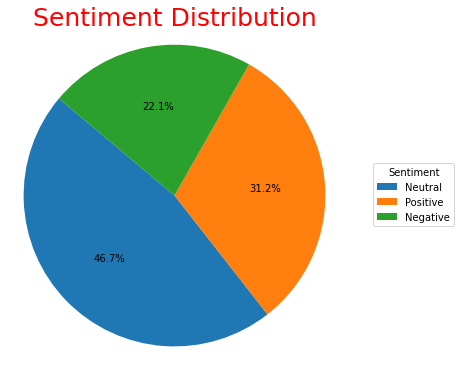

In [25]:
colors = plt.cm.tab10.colors

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(analysis_counts, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Sentiment Distribution", fontsize = 25, color = 'Red')
plt.axis('equal')  # Membuat lingkaran menjadi lingkaran penuh
plt.legend(title="Sentiment", labels=analysis_counts.index, loc="center right", bbox_to_anchor = (1.35,0.5))

plt.show()

## Seat Type Persentage

In [26]:
# Menghitung frekuensi kategori
seat_counts = df["seat_type"].value_counts()

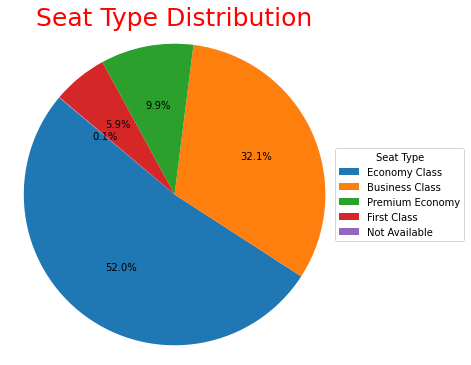

In [64]:
# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(seat_counts, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Seat Type Distribution", fontsize = 25, color = 'Red')
plt.axis('equal')  # Membuat lingkaran menjadi lingkaran penuh
plt.legend(title="Seat Type", labels=seat_counts.index, loc="center right", bbox_to_anchor = (1.38,0.5))

plt.show()

## Mengetahui rentang stars berdasarkan sentimen

In [28]:
senstargroup = df.groupby(['Analysis'])['stars'].mean()
senstargroup

Analysis
Negative    4.258398
Neutral     5.261322
Positive    4.205128
Name: stars, dtype: float64

## Relation between Stars with Country

In [29]:
starcountgroup = df.groupby(['country'])['stars'].mean()
starcountgroup = starcountgroup.reset_index()
starcountgroup.head()

,country,stars
0,Argentina,4.666667
1,Australia,4.953020
2,Austria,5.363636
3,Bahrain,1.000000
4,Belgium,6.217391


In [30]:
top_star = (df.groupby('country')['stars']
                        .mean()
                        .reset_index()
                        .sort_values(by='stars',ascending=False)
                        .head(10))
print(top_star)

                  country      stars
43                 Panama  10.000000
11                  Chile  10.000000
10         Cayman Islands   9.000000
50  Saint Kitts and Nevis   9.000000
44            Philippines   9.000000
13             Costa Rica   8.000000
64                Ukraine   8.000000
32                  Japan   7.400000
63                 Turkey   7.333333
16                Denmark   6.818182


In [31]:
starcountgroup['top_star'] = starcountgroup['country'].apply(lambda x: x if (x in top_star['country'].to_list()) else 'others')
starcountgroup

,country,stars,top_star
0,Argentina,4.666667,others
1,Australia,4.953020,others
2,Austria,5.363636,others
3,Bahrain,1.000000,others
4,Belgium,6.217391,others
...,...,...,...
64,Ukraine,8.000000,Ukraine
65,United Arab Emirates,3.869565,others
66,United Kingdom,4.712984,others
67,United States,4.686224,others


In [32]:
starcountgroup.groupby(['top_star'])['stars'].mean()

top_star
Cayman Islands            9.000000
Chile                    10.000000
Costa Rica                8.000000
Denmark                   6.818182
Japan                     7.400000
Panama                   10.000000
Philippines               9.000000
Saint Kitts and Nevis     9.000000
Turkey                    7.333333
Ukraine                   8.000000
others                    3.847792
Name: stars, dtype: float64

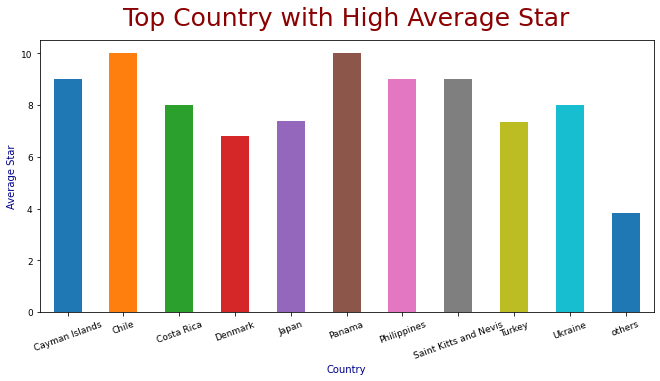

In [33]:
starcountgroup.groupby(['top_star'])['stars'].mean().plot(kind = 'bar', figsize = (11,5), color = colors)
plt.title('Top Country with High Average Star', color = 'darkred', fontsize = 25, pad=15)
plt.xlabel('Country', fontsize = 10, color = 'darkblue')
plt.ylabel('Average Star', fontsize = 10, color = 'darkblue')
plt.xticks(fontsize = 9, rotation = 20)
plt.yticks(fontsize = 9)
plt.show()

In [34]:
low_star = (df.groupby('country')['stars']
                        .mean()
                        .reset_index()
                        .sort_values(by='stars',ascending=True)
                        .head(10))
print(low_star)

               country     stars
68             Vietnam  1.000000
35                Laos  1.000000
3              Bahrain  1.000000
25             Hungary  1.000000
60              Taiwan  1.333333
49  Russian Federation  1.500000
33              Jordan  2.000000
41             Nigeria  2.000000
28           Indonesia  2.000000
18               Egypt  2.000000


In [35]:
starcountgroup['low_star'] = starcountgroup['country'].apply(lambda x: x if (x in low_star['country'].to_list()) else 'others')
starcountgroup

,country,stars,top_star,low_star
0,Argentina,4.666667,others,others
1,Australia,4.953020,others,others
2,Austria,5.363636,others,others
3,Bahrain,1.000000,others,Bahrain
4,Belgium,6.217391,others,others
...,...,...,...,...
64,Ukraine,8.000000,Ukraine,others
65,United Arab Emirates,3.869565,others,others
66,United Kingdom,4.712984,others,others
67,United States,4.686224,others,others


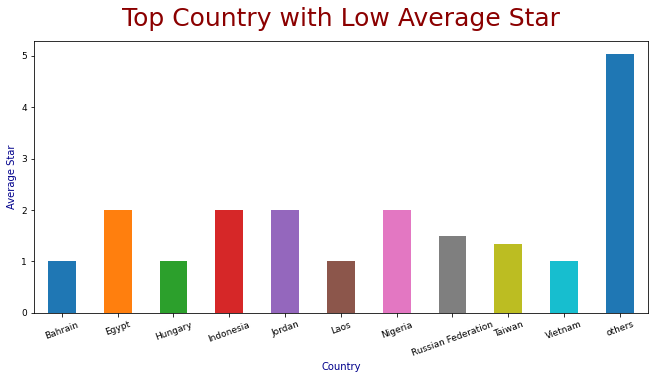

In [36]:
starcountgroup.groupby(['low_star'])['stars'].mean().plot(kind = 'bar', figsize = (11,5), color = colors)
plt.title('Top Country with Low Average Star', color = 'darkred', fontsize = 25, pad=15)
plt.xlabel('Country', fontsize = 10, color = 'darkblue')
plt.ylabel('Average Star', fontsize = 10, color = 'darkblue')
plt.xticks(fontsize = 9, rotation = 20)
plt.yticks(fontsize = 9)
plt.show()

## Count of Customer's Country

In [37]:
custgroup = df.groupby(['country'])['No'].count().reset_index()
custgroup

,country,No
0,Argentina,6
1,Australia,149
2,Austria,11
3,Bahrain,1
4,Belgium,23
...,...,...
64,Ukraine,1
65,United Arab Emirates,23
66,United Kingdom,2195
67,United States,392


In [38]:
top_country = (df.groupby('country')['No']
                        .count()
                        .reset_index()
                        .sort_values(by='No',ascending=False)
                        .head(10))
print(top_country)

           country    No
66  United Kingdom  2195
67   United States   392
1        Australia   149
9           Canada   108
21         Germany    59
29         Ireland    38
55    South Africa    38
59     Switzerland    36
39     Netherlands    34
57           Spain    29


In [39]:
low_country = (df.groupby('country')['No']
                        .count()
                        .reset_index()
                        .sort_values(by='No',ascending=True)
                        .head(10))
low_country

,country,No
68,Vietnam,1
28,Indonesia,1
43,Panama,1
17,Dominican Republic,1
35,Laos,1
52,Senegal,1
13,Costa Rica,1
11,Chile,1
10,Cayman Islands,1
50,Saint Kitts and Nevis,1


In [40]:
custgroup['top_country'] = custgroup['country'].apply(lambda x: x if (x in top_country['country'].to_list()) else 'Others')
custgroup['low_country'] = custgroup['country'].apply(lambda x: x if (x in low_country['country'].to_list()) else 'Others')
custgroup

,country,No,top_country,low_country
0,Argentina,6,Others,Others
1,Australia,149,Australia,Others
2,Austria,11,Others,Others
3,Bahrain,1,Others,Others
4,Belgium,23,Others,Others
...,...,...,...,...
64,Ukraine,1,Others,Others
65,United Arab Emirates,23,Others,Others
66,United Kingdom,2195,United Kingdom,Others
67,United States,392,United States,Others


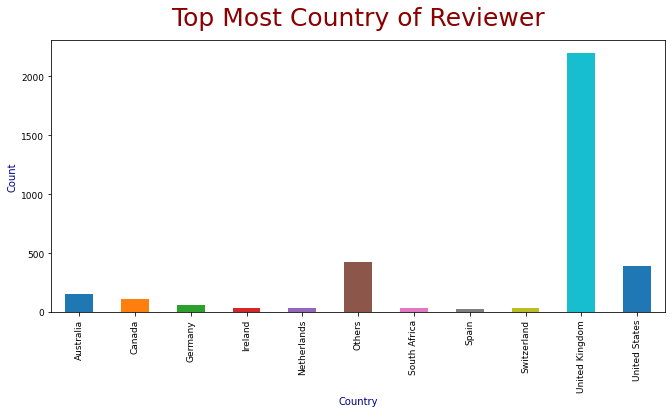

In [41]:
custgroup.groupby(['top_country'])['No'].sum().plot(kind = 'bar', figsize = (11,5), color = colors)
#top_country.plot(kind = 'bar', figsize = (11,5), color = colors)
#plt.figure(figsize = (8,5))
#plt.bar(top_country['country'], top_country['No'])
plt.title('Top Most Country of Reviewer', color = 'darkred', fontsize = 25, pad=15)
plt.xlabel('Country', fontsize = 10, color = 'darkblue')
plt.ylabel('Count', fontsize = 10, color = 'darkblue')
plt.ylim(ymin = 0)
plt.xticks(fontsize = 9, rotation = 90)
plt.yticks(fontsize = 9)
plt.show()

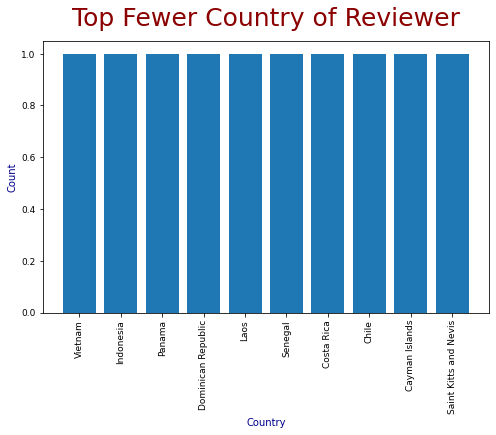

In [42]:
#top_country.plot(kind = 'bar', figsize = (11,5), color = colors)
plt.figure(figsize = (8,5))
plt.bar(low_country['country'], low_country['No'])
plt.title('Top Fewer Country of Reviewer', color = 'darkred', fontsize = 25, pad=15)
plt.xlabel('Country', fontsize = 10, color = 'darkblue')
plt.ylabel('Count', fontsize = 10, color = 'darkblue')
plt.ylim(ymin = 0)
plt.xticks(fontsize = 9, rotation = 90)
plt.yticks(fontsize = 9)
plt.show()

## Relation between Country, Seat Type, and Stars

In [43]:
cssgroup = df.groupby(['country', 'seat_type'])['stars'].mean()
cssgroup = cssgroup.reset_index()

In [44]:
top_star2 = (df.groupby('country')['stars']
                        .mean()
                        .reset_index()
                        .sort_values(by='stars',ascending=False)
                        .head(5))
print(top_star2)

                  country  stars
43                 Panama   10.0
11                  Chile   10.0
10         Cayman Islands    9.0
50  Saint Kitts and Nevis    9.0
44            Philippines    9.0


In [45]:
cssgroup['top_star'] = cssgroup['country'].apply(lambda x: x if (x in top_star2['country'].to_list()) else 'Others')

In [46]:
low_star2 = (df.groupby('country')['stars']
                        .mean()
                        .reset_index()
                        .sort_values(by='stars',ascending=True)
                        .head(5))
print(low_star2)

    country     stars
68  Vietnam  1.000000
35     Laos  1.000000
3   Bahrain  1.000000
25  Hungary  1.000000
60   Taiwan  1.333333


In [47]:
cssgroup['low_star'] = cssgroup['country'].apply(lambda x: x if (x in low_star2['country'].to_list()) else 'Others')
cssgroup = cssgroup.reset_index()

In [48]:
csslowgroup = cssgroup.groupby(['seat_type', 'low_star'])['stars'].mean().unstack().fillna(0)
csstopgroup = cssgroup.groupby(['seat_type', 'top_star'])['stars'].mean().unstack().fillna(0)
csslowgroup

low_star,Bahrain,Hungary,Laos,Others,Taiwan,Vietnam
seat_type,,,,,,
Business Class,1.0,0.0,0.0,5.074454,1.0,0.0
Economy Class,0.0,1.0,0.0,4.505772,1.5,1.0
First Class,0.0,0.0,0.0,5.035609,0.0,0.0
Not Available,0.0,0.0,0.0,3.500000,0.0,0.0
Premium Economy,0.0,0.0,1.0,3.738781,0.0,0.0


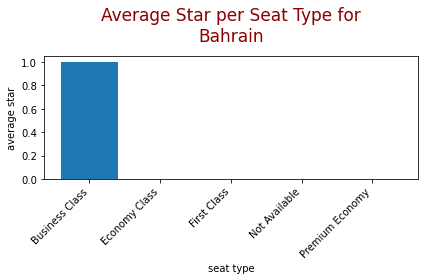

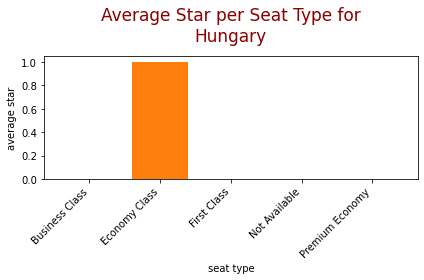

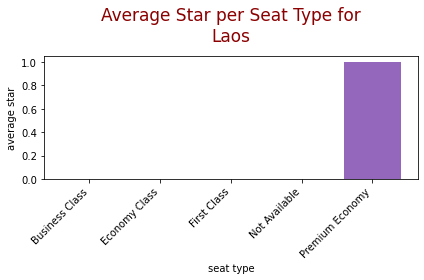

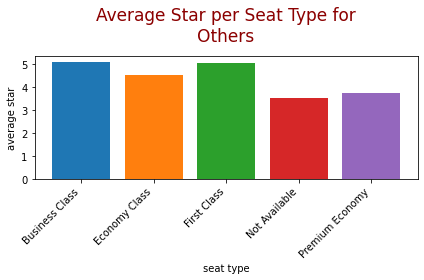

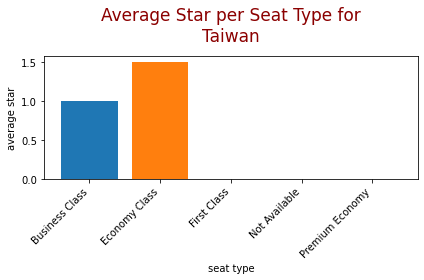

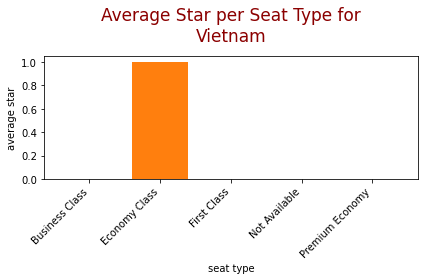

In [49]:
for col in csslowgroup.columns[0:]:
    plt.figure()
    x_labels = csslowgroup[col].index
    x_pos = range(len(x_labels))
    
    plt.bar(x_pos, csslowgroup[col], color=colors)

    plt.title(f'Average Star per Seat Type for\n{col}', fontsize=17, pad=15, color='darkred')
    plt.xlabel('seat type')
    plt.ylabel('average star')
    
    # Customize the x-axis tick labels
    plt.xticks(x_pos, x_labels, rotation=45, ha='right')
    
    plt.tight_layout()  # To make sure the labels fit properly
    plt.show()

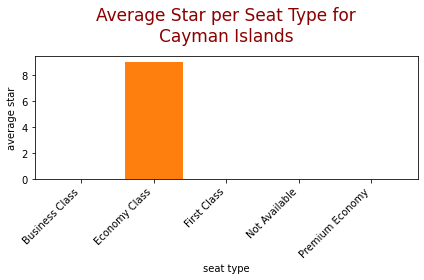

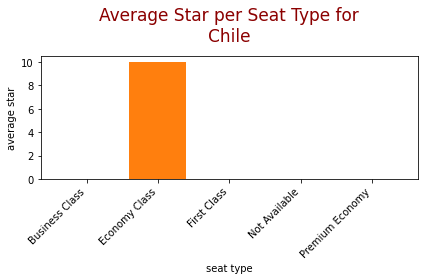

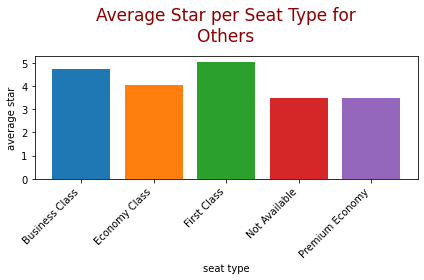

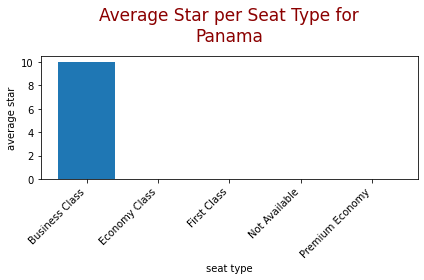

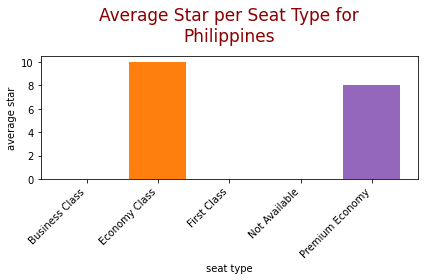

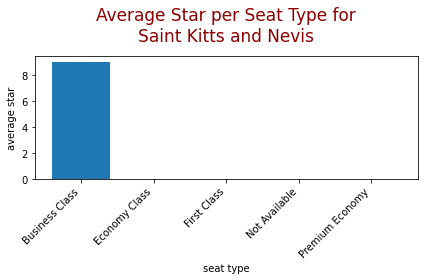

In [50]:
for col in csstopgroup.columns[0:]:
    plt.figure()
    x_labels = csstopgroup[col].index
    x_pos = range(len(x_labels))
    
    plt.bar(x_pos, csstopgroup[col], color=colors)

    plt.title(f'Average Star per Seat Type for\n{col}', fontsize=17, pad=15, color='darkred')
    plt.xlabel('seat type')
    plt.ylabel('average star')
    
    # Customize the x-axis tick labels
    plt.xticks(x_pos, x_labels, rotation=45, ha='right')
    
    plt.tight_layout()  # To make sure the labels fit properly
    plt.show()

## Relation between Country and Sentiment

In [51]:
csentgroup = df.groupby(['country', 'Analysis'])['No'].count().reset_index()
csentgroup

,country,Analysis,No
0,Argentina,Negative,2
1,Argentina,Neutral,4
2,Australia,Negative,27
3,Australia,Neutral,89
4,Australia,Positive,33
...,...,...,...
150,United Kingdom,Positive,679
151,United States,Negative,133
152,United States,Neutral,154
153,United States,Positive,105


In [52]:
csentgroup['top_country'] = csentgroup['country'].apply(lambda x: x if (x in top_country['country'].to_list()) else 'Others')
csentgroup['low_country'] = csentgroup['country'].apply(lambda x: x if (x in low_country['country'].to_list()) else 'Others')
csentgroup

,country,Analysis,No,top_country,low_country
0,Argentina,Negative,2,Others,Others
1,Argentina,Neutral,4,Others,Others
2,Australia,Negative,27,Australia,Others
3,Australia,Neutral,89,Australia,Others
4,Australia,Positive,33,Australia,Others
...,...,...,...,...,...
150,United Kingdom,Positive,679,United Kingdom,Others
151,United States,Negative,133,United States,Others
152,United States,Neutral,154,United States,Others
153,United States,Positive,105,United States,Others


In [53]:
csentgroupiv = csentgroup.groupby(['Analysis', 'top_country'])['No'].sum().unstack().fillna(0)
csentgroupiv

top_country,Australia,Canada,Germany,Ireland,Netherlands,Others,South Africa,Spain,Switzerland,United Kingdom,United States
Analysis,,,,,,,,,,,
Negative,27,23,22,7,6,88,9,4,11,444,133
Neutral,89,46,19,21,16,165,19,19,14,1072,154
Positive,33,39,18,10,12,169,10,6,11,679,105


In [54]:
csentgroupiv2 = csentgroup.groupby(['Analysis', 'low_country'])['No'].sum().unstack().fillna(0)
csentgroupiv2

low_country,Cayman Islands,Chile,Costa Rica,Dominican Republic,Indonesia,Laos,Others,Panama,Saint Kitts and Nevis,Senegal,Vietnam
Analysis,,,,,,,,,,,
Negative,0.0,0.0,0.0,0.0,0.0,0.0,774.0,0.0,0.0,0.0,0.0
Neutral,0.0,0.0,0.0,0.0,0.0,0.0,1634.0,0.0,0.0,0.0,0.0
Positive,1.0,1.0,1.0,1.0,1.0,1.0,1082.0,1.0,1.0,1.0,1.0


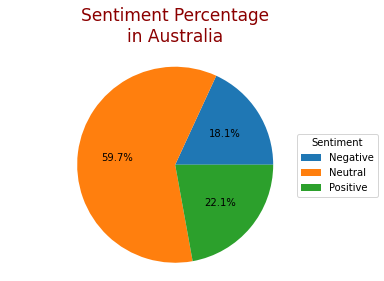

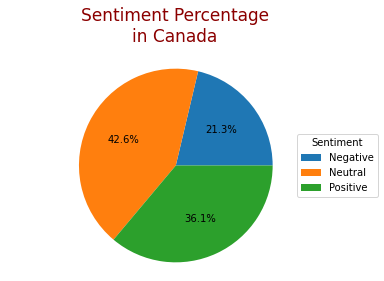

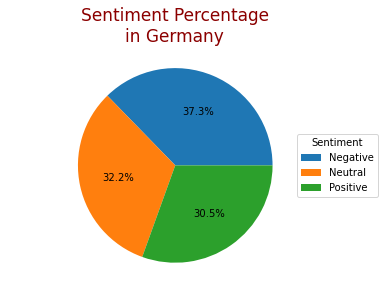

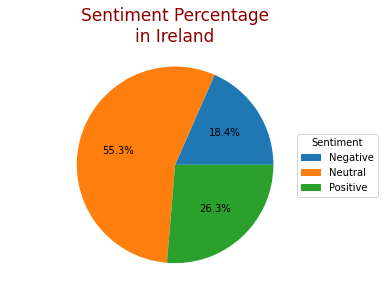

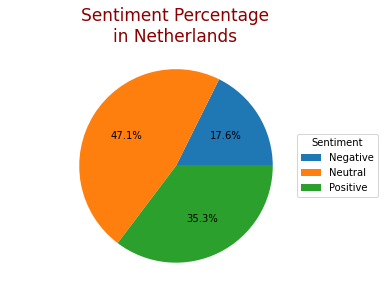

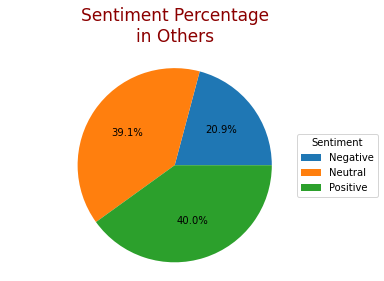

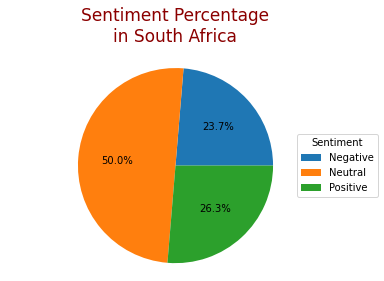

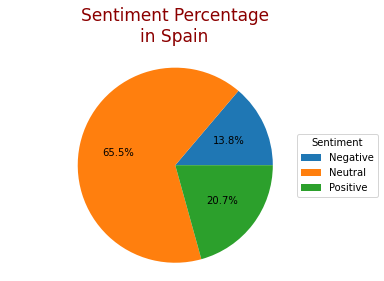

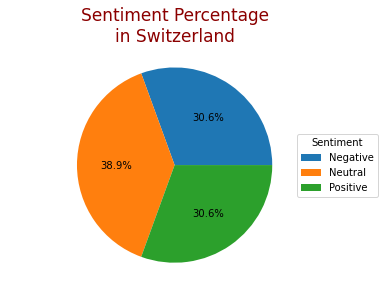

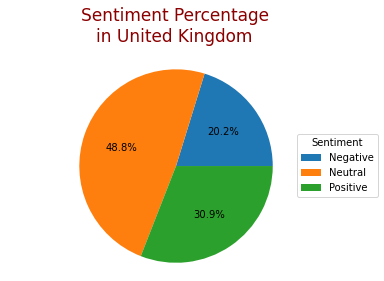

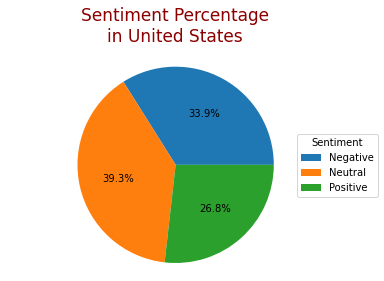

In [65]:
# Membuat diagram pie chart untuk setiap jenis kolom "durasi_stay"
for col in csentgroupiv.columns[0:]:
    plt.figure()
    wedges, texts, autotexts = plt.pie(csentgroupiv[col], 
                                       autopct='%1.1f%%', 
                                       colors=colors)
    plt.title(f'Sentiment Percentage\nin {col}', fontsize=17, pad=15, color = 'darkred')
    plt.axis('equal')

    # Create a legend based on the pie chart labels
    plt.legend(wedges, 
               csentgroupiv[col].index, 
               title='Sentiment', 
               loc='center left', 
               bbox_to_anchor=(0.85, 0, 0.5, 1))
    plt.show()

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   No         3500 non-null   int64         
 1   stars      3500 non-null   int32         
 2   date       3500 non-null   datetime64[ns]
 3   country    3500 non-null   object        
 4   seat_type  3500 non-null   object        
 5   verified   3500 non-null   bool          
 6   Sentiment  3500 non-null   float64       
 7   Analysis   3500 non-null   object        
dtypes: bool(1), datetime64[ns](1), float64(1), int32(1), int64(1), object(3)
memory usage: 181.3+ KB


## Customer Sentiment Review by Time

### Pick month and year

In [57]:
# Mengambil bulan dan tahun dari kolom date
df['month_year'] = df['date'].dt.to_period('M')
df['month_year']

0       2023-08
1       2023-08
2       2023-08
3       2023-08
4       2023-08
         ...   
3495    2014-06
3496    2014-06
3497    2014-06
3498    2014-06
3499    2014-06
Name: month_year, Length: 3500, dtype: period[M]

In [58]:
df['year'] = df['date'].dt.year
df['year']

0       2023
1       2023
2       2023
3       2023
4       2023
        ... 
3495    2014
3496    2014
3497    2014
3498    2014
3499    2014
Name: year, Length: 3500, dtype: int64

In [59]:
stmgroup = df.groupby(['year'])['stars'].mean().reset_index()
stmgroup

,year,stars
0,2014,5.761773
1,2015,5.425474
2,2016,4.949123
3,2017,3.875874
4,2018,4.339506
5,2019,4.750000
6,2020,4.326923
7,2021,4.321839
8,2022,4.042254
9,2023,3.308571


In [60]:
stygroup = df.groupby(['Analysis', 'year', ])['No'].count().unstack().fillna(0)
stygroup

year,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Analysis,,,,,,,,,,
Negative,0.0,0.0,87.0,206.0,106.0,121.0,38.0,36.0,84.0,96.0
Neutral,361.0,738.0,324.0,76.0,38.0,32.0,15.0,10.0,26.0,14.0
Positive,0.0,0.0,159.0,290.0,180.0,203.0,51.0,41.0,103.0,65.0


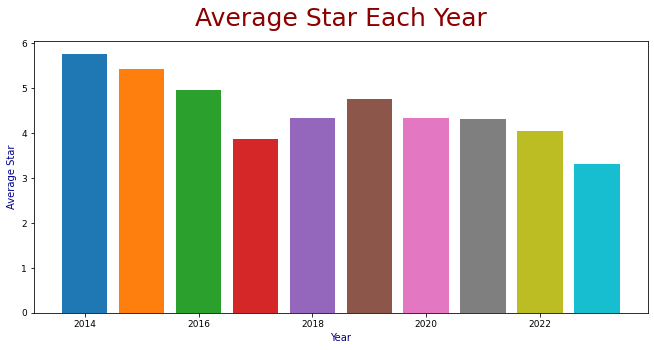

In [61]:
#stmgroup.plot(kind = 'bar', figsize = (11,5), color = colors)
plt.figure(figsize = (11,5))
plt.bar(stmgroup['year'], stmgroup['stars'], color = colors)
plt.title('Average Star Each Year', color = 'darkred', fontsize = 25, pad=15)
plt.xlabel('Year', fontsize = 10, color = 'darkblue')
plt.ylabel('Average Star', fontsize = 10, color = 'darkblue')
plt.xticks(fontsize = 9, rotation = 0)
plt.yticks(fontsize = 9)
plt.show()

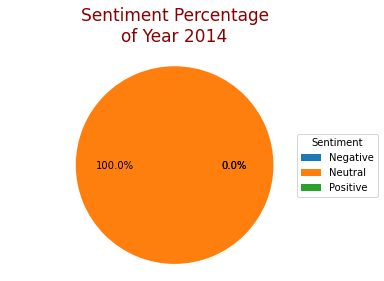

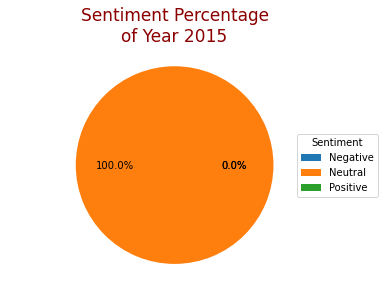

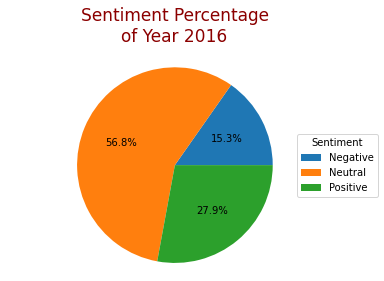

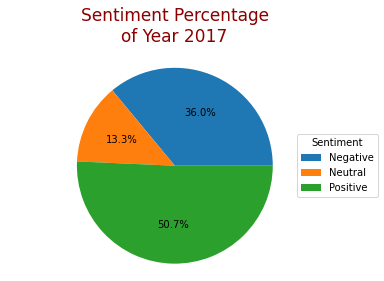

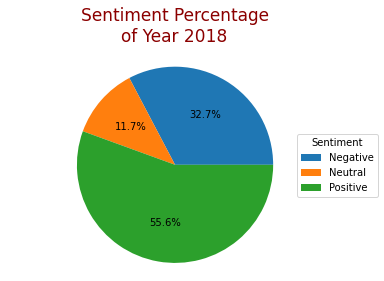

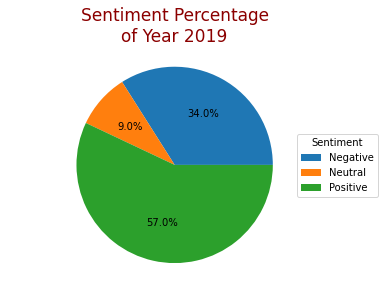

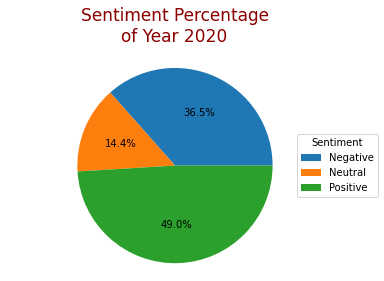

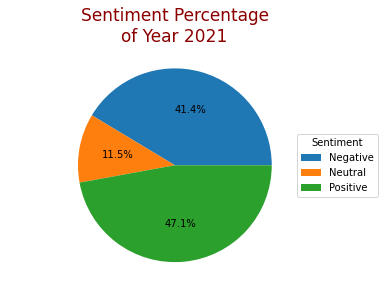

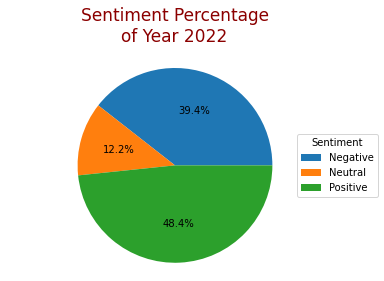

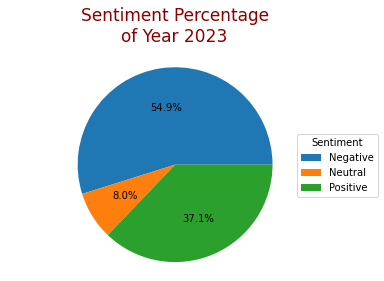

In [62]:
# Membuat diagram pie chart untuk setiap jenis kolom "durasi_stay"
for col in stygroup.columns[0:]:
    plt.figure()
    wedges, texts, autotexts = plt.pie(stygroup[col], 
                                       autopct='%1.1f%%', 
                                       colors=colors)
    plt.title(f'Sentiment Percentage\nof Year {col}', fontsize=17, pad=15, color = 'darkred')
    plt.axis('equal')

    # Create a legend based on the pie chart labels
    plt.legend(wedges, 
               stygroup[col].index, 
               title='Sentiment', 
               loc='center left', 
               bbox_to_anchor=(0.85, 0, 0.5, 1))
    plt.show()

## Relationship between Seat Type and Sentiment

In [74]:
seatgroup = df.groupby(['Analysis', 'seat_type'])['No'].count().unstack().fillna(0)
seatgroup

seat_type,Business Class,Economy Class,First Class,Not Available,Premium Economy
Analysis,,,,,
Negative,203.0,488.0,14.0,0.0,69.0
Neutral,552.0,793.0,119.0,2.0,168.0
Positive,370.0,538.0,73.0,0.0,111.0


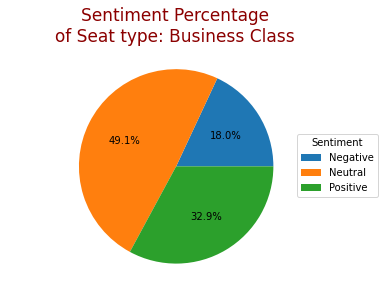

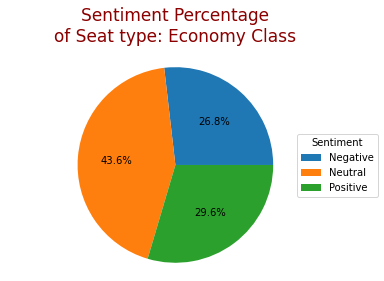

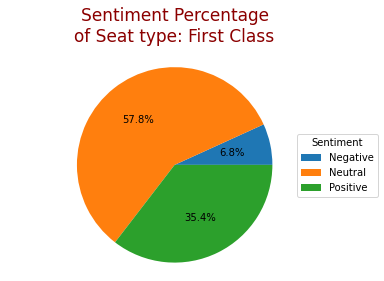

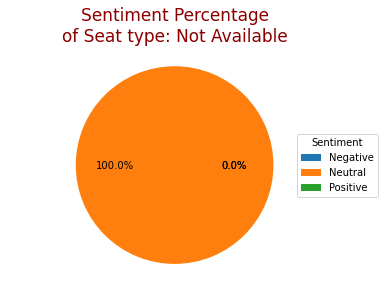

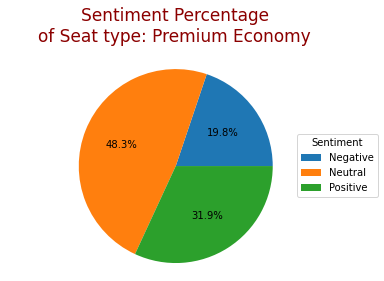

In [75]:
# Membuat diagram pie chart untuk setiap jenis kolom "durasi_stay"
for col in seatgroup.columns[0:]:
    plt.figure()
    wedges, texts, autotexts = plt.pie(seatgroup[col], 
                                       autopct='%1.1f%%', 
                                       colors=colors)
    plt.title(f'Sentiment Percentage\nof Seat type: {col}', fontsize=17, pad=15, color = 'darkred')
    plt.axis('equal')

    # Create a legend based on the pie chart labels
    plt.legend(wedges, 
               seatgroup[col].index, 
               title='Sentiment', 
               loc='center left', 
               bbox_to_anchor=(0.85, 0, 0.5, 1))
    plt.show()